In [76]:
import numpy as np  # NumPy for numerical operations

import pandas as pd  # Pandas for data manipulation and analysis
from scipy.stats import f_oneway  # SciPy for statistical analysis
from sklearn.model_selection import train_test_split  # scikit-learn for splitting data
from sklearn.linear_model import LogisticRegression  # scikit-learn for logistic regression
from sklearn.metrics import (
    precision_score,
    f1_score,
    classification_report,
    confusion_matrix,
    accuracy_score,
    mean_squared_error,
    r2_score
)  # scikit-learn for model evaluation metrics

from sklearn.preprocessing import StandardScaler, LabelEncoder  # scikit-learn for preprocessing

import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for enhanced visualization

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [77]:
# Reads the CSV file and creates a DataFrame
df = pd.read_csv("hotel_bookings_-254729914.csv")

In [78]:
# Count the null values for each column in the dataset
print(df.isnull().sum())
# Replace the null values by filling with mean or median for numeric columns
dc = df.select_dtypes(include=['number']).columns
df[dc] = df[dc].fillna(df[dc].mean())
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

 ## One-Way Anova Model

In [79]:
# Perform ANOVA to test the impact of arrival_date_day_of_month on ADR

# 'adr' is the dependent variable and 'arrival_day_of_month' is the independent categorical variable
# Filter relevant columns
data = df[['arrival_date_month', 'adr']]

# Perform ANOVA analysis
model = ols('adr ~ C(arrival_date_month)', data=data).fit()  # Ordinary Least Squares model
anova_table = sm.stats.anova_lm(model, typ=2)  # ANOVA table

# Display ANOVA results
print(anova_table)

                             sum_sq        df            F  PR(>F)
C(arrival_date_month)  5.843379e+07      11.0  2572.954399     0.0
Residual               2.464697e+08  119378.0          NaN     NaN


**The ANOVA results show:**

**C(arrival_date_month):**

Sum of Squares: 5.843379e+07
Degrees of Freedom: 11
F-statistic: 2572.95
PR(>F) (p-value): 0.0 (very close to zero)

**Residual:**

Sum of Squares: 2.464697e+08
Degrees of Freedom: 119378

**Interpretation:**
The p-value for the arrival_date_month factor (0.0) is significantly less than any reasonable significance level (like 0.05). This indicates strong evidence against the null hypothesis, suggesting that at least one month has a significantly different effect on the ADR compared to others.

**Conclusion:**
The arrival date month has a statistically significant impact on the Average Daily Rate for hotels. In other words, there are significant differences in ADR among different months. Further post-hoc tests or detailed analysis could be conducted to identify specific months with significantly different ADRs.






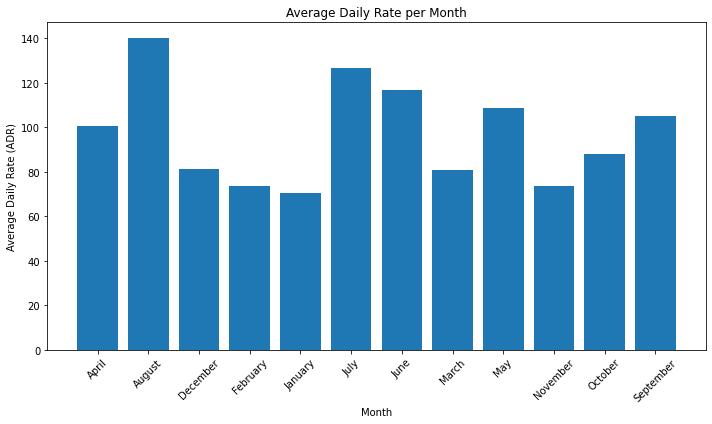

In [80]:
# Visualize the impact of arrival_date_day_of_month on ADR
# Grouping by 'arrival_date_month' and calculating mean of 'adr'
mean_adr_per_month = df.groupby('arrival_date_month')['adr'].mean().reset_index()

# Plotting the mean ADR for each month
plt.figure(figsize=(10, 6))
plt.bar(mean_adr_per_month['arrival_date_month'], mean_adr_per_month['adr'])
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average Daily Rate per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Two-Way Anova Model 

In [81]:
# Perform ANOVA to test the impact of country and hotel type on ADR

# 'adr' is the dependent variable and 'country', 'hotel' are independent categorical variables.

# Represents the two-way interaction between 'country' and 'hotel'
# Fit the ANOVA model
model = ols('adr ~ C(country) + C(hotel) + C(country):C(hotel)', data=df).fit()

# Perform two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                           sum_sq        df          F  PR(>F)
C(country)           1.115581e+07     176.0  26.683601     0.0
C(hotel)            -2.706684e+02       1.0  -0.113945     1.0
C(country):C(hotel)  1.081625e+07     176.0  25.871393     0.0
Residual             2.817534e+08  118611.0        NaN     NaN


C:\Users\people\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 176, but rank is 125
  warnings.warn('covariance of constraints does not have full '
C:\Users\people\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 176, but rank is 125
  warnings.warn('covariance of constraints does not have full '


**Anova Results shows:**

**C(country): represents the impact of the country on the average daily rate (ADR).**

sum_sq: The sum of squares attributed to the effect of the country on ADR.
df: Degrees of freedom associated with the country factor.
F: The calculated F-statistic for the country factor.
PR(>F): The p-value associated with the F-statistic. It suggests the statistical significance of the country's impact on ADR. In this case, the p-value is very low (close to 0), indicating a significant impact.

**C(hotel): Indicates the impact of the hotel type on the ADR.**

sum_sq: The sum of squares for the hotel type's effect on ADR.
df: Degrees of freedom associated with the hotel type factor.
F: The F-statistic calculated for the hotel type factor.
PR(>F): The p-value associated with the F-statistic for hotel type. Here, the p-value is 1.0, suggesting no significant impact of hotel type on ADR.

**C(country):C(hotel): This represents the interaction effect between country and hotel type on ADR.**

sum_sq: The sum of squares for the interaction effect between country and hotel type.
df: Degrees of freedom associated with the interaction effect.
F: The F-statistic calculated for the interaction effect.
PR(>F): The p-value associated with the F-statistic for the interaction effect. Similar to the country effect, the p-value is close to 0, indicating a significant impact of the interaction between country and hotel type on ADR.

**Residual: Accounts for the unexplained variance or residual variance in ADR.**

sum_sq: The sum of squares for the residuals.
df: Degrees of freedom for the residuals.
NaN: Since it's the residual, the F-statistic and p-value are not applicable.

Overall, it seems that both country and the interaction between country and hotel type have a significant impact on the average daily rate, while the hotel type alone does not show a significant impact.

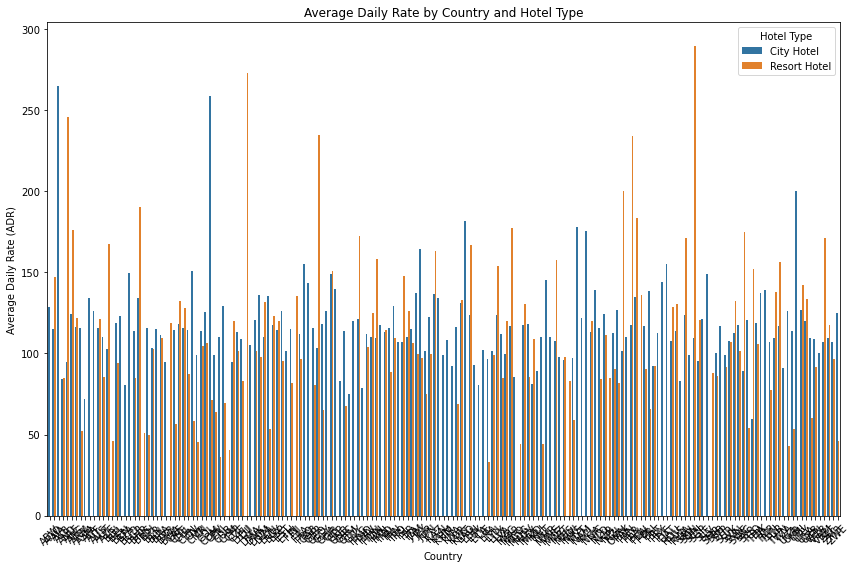

In [82]:
# Visualize the impact of country and hotel type on ADR
# Grouping the data by 'country' and 'hotel' to calculate the mean ADR
grouped = df.groupby(['country', 'hotel'])['adr'].mean().reset_index()

# Creating a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='adr', hue='hotel', data=grouped)
plt.title('Average Daily Rate by Country and Hotel Type')
plt.xlabel('Country')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

## Linear Regression Model 1

In [83]:
# Perform Linear Regression to test the impact of Lead-time on adr
# Splitting the data into features (X) and target variable (y)
X = df[['lead_time']]  # Feature
y = df['adr']  # Target variable

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression
# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting ADR values on the test set
y_pred = model.predict(X_test)

# Calculating the coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Printing coefficients, intercept, and MSE
print(f'Coefficients: {coefficients[0]:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

Coefficients: -0.03
Intercept: 105.01
Mean Squared Error: 2277.39
R-squared: 0.004194573726446049


**Coefficients:** The coefficient (-0.03 in your case) represents the change in the dependent variable (ADR) for a one-unit change in the independent variable (lead-time), assuming all other variables remain constant. A negative coefficient suggests a negative correlation between lead-time and ADR.

**Intercept:** The intercept (105.01 in your case) is the value of the dependent variable (ADR) when all independent variables are zero. In this context, it might not have a practical interpretation since lead-time is unlikely to be zero.

**Mean Squared Error (MSE):** This metric measures the average of the squares of the errors or deviations—differences between predicted and actual values. Lower MSE values indicate a better fit of the model to the data. In your case, an MSE of 2277.39 indicates the average squared difference between the predicted ADR values and the actual ADR values.

**R-Squared Value:** Model has a very low R-squared value (0.0042), indicating that the model explains only a small portion of the variance in the data. Additionally, the coefficients being close to zero indicate a weak linear relationship between the predictor and the target variable. This suggests that the linear regression model might not be the best choice for capturing the relationship between lead time and ADR.

These results suggest that, on average, model's predictions deviate by approximately 2277.39 units squared from the actual ADR values. The negative coefficient indicates a decrease in ADR with an increase in lead-time, although it's essential to consider other factors and evaluate the model's overall performance before drawing definitive conclusions.

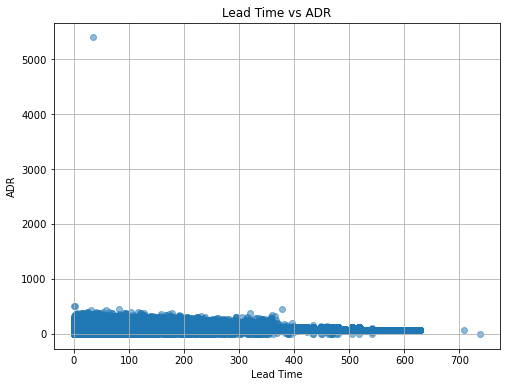

In [85]:
# Visualize how lead-time impacts adr
plt.figure(figsize=(8, 6))

# Creating a scatter plot
# Scatter plot of lead time vs ADR
plt.scatter(df['lead_time'], df['adr'], alpha=0.5)  
plt.title('Lead Time vs ADR')  
plt.xlabel('Lead Time') 
plt.ylabel('ADR')  
plt.grid(True)  
plt.show()  

## Linear Regression Model 2

In [86]:
# Perform Linear Regression to test the impact of reserved_room_type and assigned_room_type on probability of a booking being cancelled
# Encoding categorical variables
label_encoder = LabelEncoder()
df['reserved_room_type'] = label_encoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = label_encoder.fit_transform(df['assigned_room_type'])

# Features and target variable
X = df[['reserved_room_type', 'assigned_room_type']]
y = df['is_canceled']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting cancellation on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[14810    97]
 [ 8969     2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.99      0.77     14907
           1       0.02      0.00      0.00      8971

    accuracy                           0.62     23878
   macro avg       0.32      0.50      0.38     23878
weighted avg       0.40      0.62      0.48     23878

Accuracy: 0.6203199597956278


**Confusion Matrix:**

True Negative (TN): 14810 (Non-cancelled bookings correctly predicted)
False Positive (FP): 97 (Non-cancelled bookings predicted as cancelled)
False Negative (FN): 8969 (Cancelled bookings predicted as non-cancelled)
True Positive (TP): 2 (Cancelled bookings correctly predicted)

**Accuracy:**

Overall accuracy of the model: 62.03%
Precision for class 0 (non-cancelled bookings): 62%
Precision for class 1 (cancelled bookings): 2%
Recall (Sensitivity) for class 0: 99%
Recall (Sensitivity) for class 1: 0%
F1-score for class 0: 77%
F1-score for class 1: 0%

**Conclusion:**

The model achieved high accuracy in predicting non-cancelled bookings (class 0) but performed poorly in predicting cancelled bookings (class 1), which is evident from the low precision, recall, and F1-score for class 1. This discrepancy suggests that the model might not effectively capture the patterns associated with cancelled bookings. Further feature engineering or model refinement might be necessary to improve predictions for cancellations.

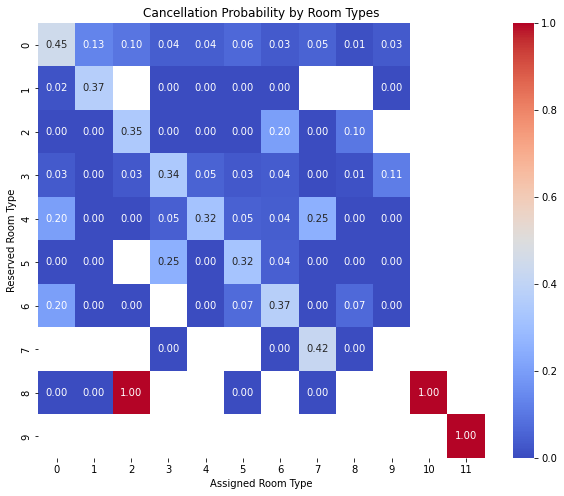

In [88]:
# Visualize the impact of reserved_room_type and assigned_room_type on probability of a booking being cancelled

# Calculate cancellation probabilities
canceled_probs = df.groupby(['reserved_room_type', 'assigned_room_type'])['is_canceled'].mean().reset_index()

# Pivot the data for visualization
pivot_data = canceled_probs.pivot('reserved_room_type', 'assigned_room_type', 'is_canceled')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cancellation Probability by Room Types')
plt.xlabel('Assigned Room Type')
plt.ylabel('Reserved Room Type')
plt.show()

## Linear Regression Model 3

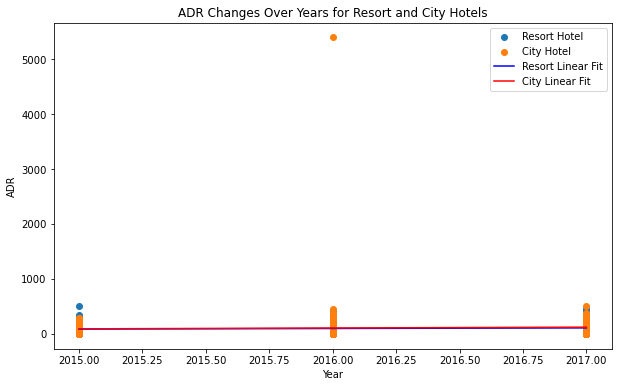

Resort Hotel Coefficients: 10.869807881398792
Resort Hotel Intercept: -21819.89981958751
City Hotel Coefficients: 15.513206209169454
City Hotel Intercept: -31172.02296575127


In [89]:
# Perform Linear Regression to understand how Adr changes for hotels over years

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains columns arrival_date_year, hotel, and adr

# Filter data for resort and city hotels
resort_data = df[df['hotel'] == 'Resort Hotel']
city_data = df[df['hotel'] == 'City Hotel']

# Linear Regression for Resort Hotel
resort_model = LinearRegression()
X_resort = resort_data['arrival_date_year'].values.reshape(-1, 1)
y_resort = resort_data['adr'].values
resort_model.fit(X_resort, y_resort)
resort_predictions = resort_model.predict(X_resort)

# Linear Regression for City Hotel
city_model = LinearRegression()
X_city = city_data['arrival_date_year'].values.reshape(-1, 1)
y_city = city_data['adr'].values
city_model.fit(X_city, y_city)
city_predictions = city_model.predict(X_city)

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.scatter(resort_data['arrival_date_year'], resort_data['adr'], label='Resort Hotel')
plt.scatter(city_data['arrival_date_year'], city_data['adr'], label='City Hotel')
plt.plot(resort_data['arrival_date_year'], resort_predictions, color='blue', label='Resort Linear Fit')
plt.plot(city_data['arrival_date_year'], city_predictions, color='red', label='City Linear Fit')
plt.xlabel('Year')
plt.ylabel('ADR')
plt.title('ADR Changes Over Years for Resort and City Hotels')
plt.legend()
plt.show()

# Printing coefficients and intercepts
print("Resort Hotel Coefficients:", resort_model.coef_[0])
print("Resort Hotel Intercept:", resort_model.intercept_)
print("City Hotel Coefficients:", city_model.coef_[0])
print("City Hotel Intercept:", city_model.intercept_)


Those coefficients and intercepts represent the relationships identified by the linear regression models between the arrival year and the Average Daily Rate (ADR) for resort and city hotels:

**Resort Hotel:**
Coefficient: 10.87
Intercept: -21819.90

**City Hotel:**
Coefficient: 15.51
Intercept: -31172.02

These coefficients indicate the change in ADR concerning each year for each hotel type. For instance, for the city hotel, the ADR tends to increase by approximately 15.51 units per year, and the initial ADR at year 0 (intercept) is around -31172.02. Similarly, for the resort hotel, the ADR tends to increase by approximately 10.87 units per year, with an initial ADR at year 0 of around -21819.90.